In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('football_data.csv')

In [4]:
df.head()

,Unnamed: 0,Unnamed: 1,position,team,matches,wins,draws,loses,scored,missed,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,Bundesliga,2015,1,Bayern Munich,34,28,4,2,80,17,...,20.794377,3.794377,19.278818,50.942669,6.563205,23.119249,353,103,77.9685,-10.0315
1,Bundesliga,2015,2,Borussia Dortmund,34,24,6,4,82,34,...,29.177493,-4.822507,26.146554,52.697884,7.698882,18.386425,387,126,76.5776,-1.4224
2,Bundesliga,2015,3,Bayer Leverkusen,34,18,6,10,56,40,...,41.235821,1.235821,35.931561,14.703136,6.165958,8.521662,243,165,56.6645,-3.3355
3,Bundesliga,2015,4,Borussia M.Gladbach,34,17,4,13,67,50,...,49.069221,-0.930779,43.007082,7.630760,8.310616,11.972256,243,186,50.0596,-4.9404
4,Bundesliga,2015,5,Schalke 04,34,15,7,12,51,49,...,47.883320,-1.116680,45.609996,-2.269053,9.777487,10.325190,228,197,45.6242,-6.3758


In [5]:
# Rename unnamed columns
df = df.rename(columns = {'Unnamed: 0': 'League', 'Unnamed: 1':'SeasonYear', 'missed':'against'})

In [6]:
df.head()

,League,SeasonYear,position,team,matches,wins,draws,loses,scored,against,...,xGA,xGA_diff,npxGA,npxGD,ppda_coef,oppda_coef,deep,deep_allowed,xpts,xpts_diff
0,Bundesliga,2015,1,Bayern Munich,34,28,4,2,80,17,...,20.794377,3.794377,19.278818,50.942669,6.563205,23.119249,353,103,77.9685,-10.0315
1,Bundesliga,2015,2,Borussia Dortmund,34,24,6,4,82,34,...,29.177493,-4.822507,26.146554,52.697884,7.698882,18.386425,387,126,76.5776,-1.4224
2,Bundesliga,2015,3,Bayer Leverkusen,34,18,6,10,56,40,...,41.235821,1.235821,35.931561,14.703136,6.165958,8.521662,243,165,56.6645,-3.3355
3,Bundesliga,2015,4,Borussia M.Gladbach,34,17,4,13,67,50,...,49.069221,-0.930779,43.007082,7.630760,8.310616,11.972256,243,186,50.0596,-4.9404
4,Bundesliga,2015,5,Schalke 04,34,15,7,12,51,49,...,47.883320,-1.116680,45.609996,-2.269053,9.777487,10.325190,228,197,45.6242,-6.3758


In [7]:
# Extract LFC data for later analysis, because I am a Liverpool (LFC) fan

lfc_data = df[df['team']=='Liverpool']
print(lfc_data.head())

    League  SeasonYear  position       team  matches  wins  draws  loses  \
97     EPL        2015         8  Liverpool       38    16     12     10   
113    EPL        2016         4  Liverpool       38    22     10      6   
133    EPL        2017         4  Liverpool       38    21     12      5   
151    EPL        2018         2  Liverpool       38    30      7      1   
170    EPL        2019         1  Liverpool       38    32      3      3   

     scored  against  ...        xGA   xGA_diff      npxGA      npxGD  \
97       63       50  ...  37.882860 -12.117140  35.527447  17.315877   
113      78       42  ...  37.652328  -4.347671  33.846486  26.696722   
133      84       38  ...  35.751621  -2.248379  31.184615  43.998704   
151      89       22  ...  29.145105   7.145105  28.383936  45.745424   
170      85       33  ...  39.572898   6.572898  38.811728  32.575792   

     ppda_coef  oppda_coef  deep  deep_allowed     xpts  xpts_diff  
97    7.915811   11.826111   373   

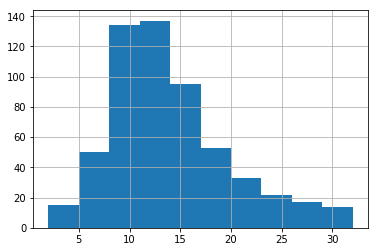

In [8]:
df.wins.hist()

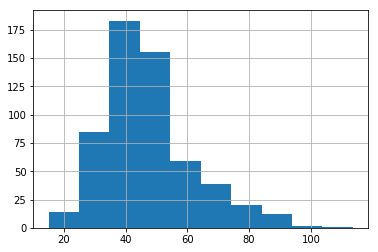

In [9]:
df.xG.hist()

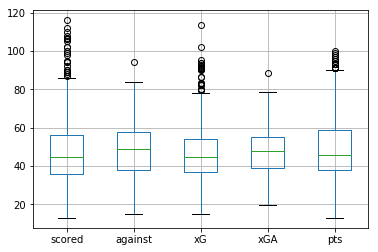

In [10]:
df.boxplot(column = ['scored','against','xG', 'xGA', 'pts'])

In [11]:
df[['scored','against','xG','xGA','pts', 'xpts']].corr()

,scored,against,xG,xGA,pts,xpts
scored,1.000000,-0.297565,0.924384,-0.277076,0.879430,0.872360
against,-0.297565,1.000000,-0.247973,0.881634,-0.592153,-0.495476
xG,0.924384,-0.247973,1.000000,-0.213602,0.821760,0.910853
xGA,-0.277076,0.881634,-0.213602,1.000000,-0.501956,-0.508365
pts,0.879430,-0.592153,0.821760,-0.501956,1.000000,0.913000
xpts,0.872360,-0.495476,0.910853,-0.508365,0.913000,1.000000


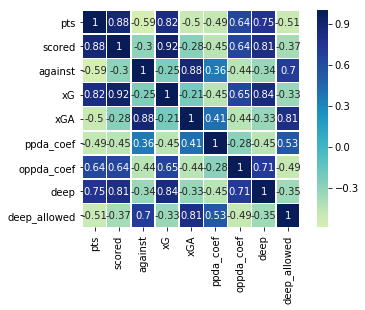

In [12]:
sns.heatmap(df[['pts','scored','against','xG','xGA', 'ppda_coef','oppda_coef','deep', 'deep_allowed']].corr(), center=0, square=True, linewidths=.5, annot=True, cmap = "YlGnBu")

In [13]:
df.columns

Index(['League', 'SeasonYear', 'position', 'team', 'matches', 'wins', 'draws',
       'loses', 'scored', 'against', 'pts', 'xG', 'xG_diff', 'npxG', 'xGA',
       'xGA_diff', 'npxGA', 'npxGD', 'ppda_coef', 'oppda_coef', 'deep',
       'deep_allowed', 'xpts', 'xpts_diff'],
      dtype='object')

In [14]:
df_cat = df[['wins', 'loses', 'position']]

graph for wins: total = 30


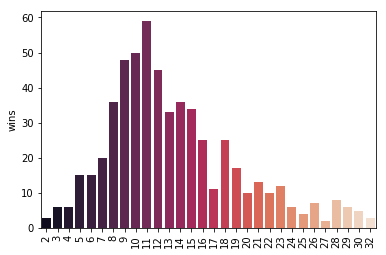

graph for loses: total = 29


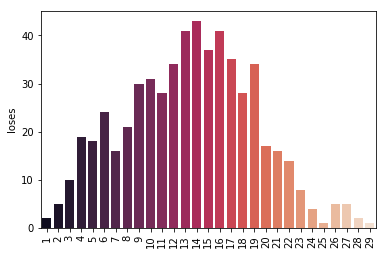

graph for position: total = 20


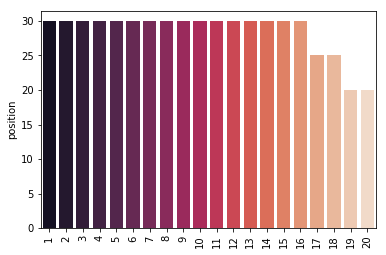

In [15]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('graph for %s: total = %d' % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num, palette = 'rocket')
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [16]:
pd.options.display.max_rows
pd.set_option('display.max_rows', 15)

In [17]:
pd.pivot_table(df, index = ['pts', 'team', 'SeasonYear'], values = 'position').sort_values('pts',ascending=False)

position
pts team                SeasonYear          
100 Manchester City     2017               1
99  Liverpool           2019               1
98  Manchester City     2018               1
97  Liverpool           2018               2
96  Paris Saint Germain 2015               1
95  Monaco              2016               1
    Juventus            2017               1
...                                      ...
18  Troyes              2015              20
17  Aston Villa         2015              20
16  Huddersfield        2018              20
15  Pescara             2016              20
14  Tom Tomsk           2016              16
13  Toulouse            2019              20
    SKA-Khabarovsk      2017              16

[570 rows x 1 columns]